# Determining the Best Markets to Advertise In

We'll be analyzing data to inform an e-learning company's business decision. The company is looking to promote their product and make investments in advertising. The product costs the user $100 per month.

In this analysis, we'll determine the best two markets for the company to advertise their product.

In [27]:
import pandas as pd
from numpy import std, var
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 150 # to avoid truncated output 

### Gathering the data
One option to collect the necessary data for this analysis is to organize our own surveys in different markets to determine the best choices for a marketing campaign. This, however, is a cost-heavy option and requires a significant amount of effort.

Alternatively, we can search for already available data that can help us find an answer for which markets to advertise in. This will keep costs and data-collection effort down.

For this analysis we're using data collected from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). freeCodeCamp is an e-learning platform with a popular Medium publication. Their survey attracted new coders with varying interests, making the data ideal for our analysis. It contains information about bootcamps attended by responders, as well as information about their city and other learning resources they've used.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [28]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.shape

(18175, 136)

In [29]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Checking for representative population
Our e-learning company focuses on web and mobile development courses, but also covers some other domains like data science and game development. We need to verify that the survey data is representative of the population we want: new coders interested in the subjects we teach.

In [30]:
# frequency table for responses of roles respondents are interested in
survey['JobRoleInterest'].value_counts(normalize= True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                                                         

From the above frequency table we can observe that respondents can choose more than one role, and in fact it appears that the majority have indeed chosen more than one role of interest. Next, we'll confirm this observation, and determine what's the interest level in web or mobile development, the focus of our offered courses.

In [31]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = survey['JobRoleInterest'].dropna()
split_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = split_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

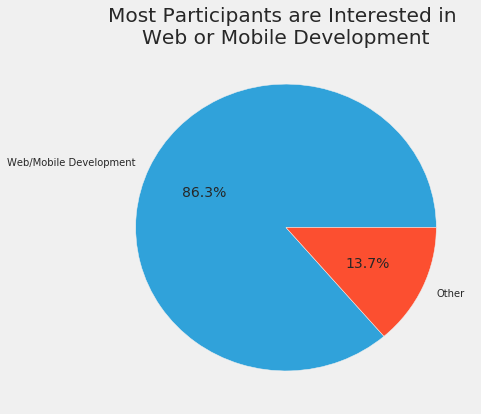

In [32]:
plt.style.use('fivethirtyeight')
web_mobile = interests_no_nulls.str.contains('Web|Mobile')
web_mobile.value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%', labels=['Web/Mobile Development', 'Other'])
plt.title('Most Participants are Interested in \nWeb or Mobile Development')
plt.ylabel('') # removes the label of the y-axis
plt.show()

We can confirm that the majority (~68%) of respondents are interested in more than one job role, however, we've also learned that 86.3% of the respondents chose Web or Mobile Development as one of their choices. Based on these findings, this data is representative of the population we're analyzing.

### Prospect Locations and Densities
Next, we can start our analysis and we'll begin by looking into the locations where respondents live and consider the country as one market. This way, our goal becomes to determine the best two countries in which to focus advertisement investments.

In [33]:
#remove rows where respondents didn't choose at least one role of interest
survey.dropna(subset=['JobRoleInterest'], inplace = True)

#frequency table for countries where respondents live
#absolute frequencies
survey['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

In [34]:
#relative frequencies
survey['CountryLive'].value_counts(normalize= True) *100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Philippines                       0.760456
Serbia                            0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

Based on the frequencies above, we see that the USA has by far the largest amount of respondents with almost 46% of respondents living there. As a comparison, India, the country with the second largest number of respondents has about 8% of the population, almost 6 times less than the number of USA respondents. We can also observe that's there a large amount of markets with 2% or less of the respondents living there, but these countries hold 40% of the total respondent population.

With these results, we would recommend the USA and India as being the two best markets for advertisement given that most respondents (53.4%) are living in one of the two countries. We can go further in depth though.

### Analyzing amount of money spent by respondents
Next, we'll look at the amount of money respondents are willing to spend per month for learning. We'll narrow this part of the analysis to respondents from the USA, India, United Kingdom and Canada since these countries make up the majority of the respondent population. It's also beneficial since our courses are in English, which is the most spoken language in each of these countries.

In [35]:
survey['MonthsProgramming'].value_counts().sort_index().head()

0.0    235
1.0    767
2.0    669
3.0    637
4.0    367
Name: MonthsProgramming, dtype: int64

In [36]:
#replace 0 with 1 for number of months programming
survey['MonthsProgramming']=survey['MonthsProgramming'].replace(0,1)

#new column for amount of money spent per month
survey['MoneyPerMonth'] = survey['MoneyForLearning']/survey['MonthsProgramming']
survey['MoneyPerMonth'].value_counts().sort_index().head()

0.000000    3092
0.033333       1
0.050000       1
0.055556       1
0.066667       1
Name: MoneyPerMonth, dtype: int64

In [37]:
#remove rows where money spent is 0
survey = survey[survey['MoneyPerMonth']>0]

#remove rows where country living in is null
survey.dropna(subset=['CountryLive'], inplace=True)

#money spent per month, on average per country
groupby_country = survey.groupby(['CountryLive']).mean()
groupby_country['MoneyPerMonth'].loc[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    413.043929
India                       311.202759
United Kingdom               92.730727
Canada                      238.970444
Name: MoneyPerMonth, dtype: float64

The results for the United Kingdom and India seems bit low relative to the amount spent per month in the USA and India. We'll want to make sure we don't have any outliers that are significantly skewing our results.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



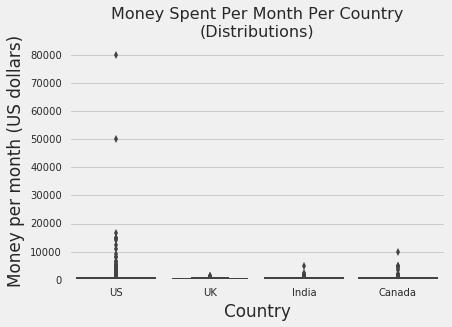

In [38]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
survey_4_countries = survey[survey['CountryLive'].isin(countries)]

#box plot of money spent per month, by country
sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = survey_4_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylim((0,85000))
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We observe that there are extreme outliers for the US data, which inflate the average amount of money spent in that country. India and Canada also have some outliers, but not to the extreme degree the US does.

In [39]:
#removing USA outliers
survey_4_countries = survey_4_countries[survey_4_countries['MoneyPerMonth']<20000]

#recalculating means
groupby_country = survey_4_countries.groupby(['CountryLive']).mean()
groupby_country['MoneyPerMonth'].loc[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    333.159012
India                       311.202759
United Kingdom               92.730727
Canada                      238.970444
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



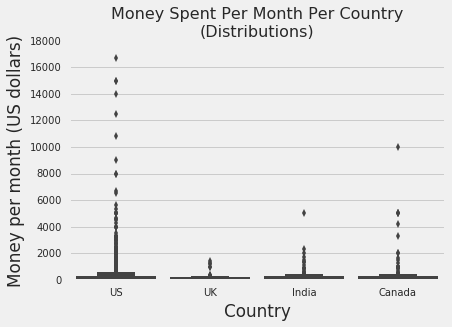

In [40]:
#box plot of money spent per month, by country
sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = survey_4_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Removing the extreme outliers for the USA made the data appearmore accurate but on further inspection of the box plots for the filtered data, we observe that there's still some outliers for India, Canada, and the USA which skew the averages higher. Given that for India and Canada, these outliers are a handful, we'll go ahead and remove them.

In [41]:
#removing further outliers
survey_4_countries = survey_4_countries[survey_4_countries['MoneyPerMonth']<3000]

#recalculating means
groupby_country = survey_4_countries.groupby(['CountryLive']).mean()
groupby_country['MoneyPerMonth'].loc[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    195.166638
India                       154.111562
United Kingdom               92.730727
Canada                      196.837439
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



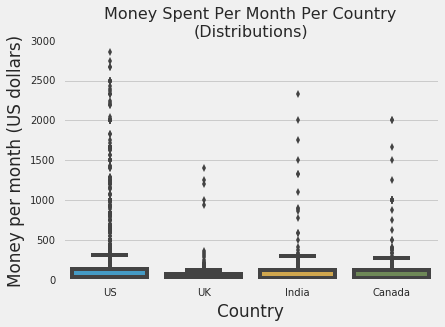

In [42]:
#box plot of money spent per month, by country
sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = survey_4_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

### Choosing the two best market to advertise in

Based on our results above, it is clear that the best market to advertise in is the USA. It has the largest amount of new coders, who are willing to spend the most amount of money across the four markets we considered. This will results in a high amount of ROI from a marketing campaign.

Respondents in the UK spend an average of \$93 per month on learning, so we can exclude them as a candidate for advertising since this is below our product price of \$100. Respondents in both Canada and India are willing to spend over \$100 per month, which makes both markets good candidates for us to advertise in. To decide between the two, we then look at the new coder population in each location:

In [44]:
survey_4_countries['CountryLive'].value_counts(normalize= True) *100

United States of America    78.013834
India                        9.634387
United Kingdom               6.768775
Canada                       5.583004
Name: CountryLive, dtype: float64

India has a new coder population that's 71% larger than Canada's, which suggests that India would be a better choice as our second market to advertise in.

### Conclusion

In this analysis, we used available data from freeCodeCamp's 2017 survey to determine the best markets (countries) to advertise in. We evaluated markets based on number of new coders and amount of money they're willing to spend per month on learning.

The first part of our analysis helped narrow our choices down to four markets: Canada, India, UK, and USA. Our results showed that the UK was not a viable candidate, while the USA was our best option. Both Canada and India would make adequate choices as our second market, but the higher amount of new coders in India give it the edge. At this point, we would pass our analysis on to the marketing team, who can add domain knowlege not part of this analysis for a final decision between India and Canada.